In [3]:
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

In [8]:
import sys
sys.path.append("creation_functions")
from creation_functions.utilities import custom_cross_validation, make_report

In [10]:
non_corr_df = pd.read_csv("processed_dataset/preprocessed_dataset.csv", index_col=0)
non_corr_df = non_corr_df.sample(frac=1, random_state=123)
X=non_corr_df.drop(["class", "trial", "subject"], axis=1)
y=non_corr_df["class"]

In [4]:
non_corr_df

,gravity.x_mean,gravity.x_std,gravity.x_kurtosis,gravity.x_skewness,gravity.y_mean,gravity.y_std,gravity.y_kurtosis,gravity.y_skewness,gravity.z_mean,gravity.z_std,...,userAcceleration.zX#4,userAcceleration.zX#5,userAcceleration.zP#1,userAcceleration.zP#2,userAcceleration.zP#3,userAcceleration.zP#4,userAcceleration.zP#5,class,trial,subject
7971,0.049684,0.068697,-0.508122,-0.537756,0.951522,0.041824,-0.259552,-0.816930,-0.190372,0.222209,...,0.001333,0.001600,8.555069,19.868540,19.407871,16.193896,13.735477,wlk,8,9
5019,-0.188365,0.005155,-0.611958,-0.179938,0.981499,0.000852,0.115307,-0.617015,-0.023017,0.024875,...,0.001600,0.002533,0.564440,0.400878,0.301761,0.255283,0.204928,std,6,21
3564,0.222633,0.139530,-0.807256,-0.982719,0.411857,0.032023,1.460239,-1.447279,-0.871365,0.032108,...,0.001867,0.002267,0.805145,0.738788,0.806571,0.853295,1.234047,sit,13,15
8257,-0.059926,0.038670,-1.259147,0.201190,0.979257,0.016441,-1.654349,-0.045271,-0.142641,0.123792,...,0.001467,0.002133,2.852012,13.942494,4.688786,8.881615,6.381941,wlk,8,18
2151,0.426569,0.002923,-1.118778,-0.858158,0.423011,0.000867,-0.300038,0.784903,-0.799430,0.001677,...,0.001333,0.002000,0.046200,0.074028,0.061868,0.059475,0.077288,sit,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,-0.097348,0.025307,0.188260,0.599843,0.939257,0.045519,-1.273035,-0.363979,-0.169761,0.276935,...,0.001333,0.001733,17.540359,35.915592,26.363897,26.543629,17.224535,wlk,7,17
7763,0.241607,0.074150,-0.672296,-0.555844,0.880453,0.061713,-1.516856,-0.134419,-0.305566,0.252365,...,0.001333,0.001733,10.580364,26.319629,24.618864,23.229936,13.780275,wlk,8,2
5218,0.087988,0.029383,-0.076505,-0.555812,0.991939,0.003463,-0.310135,0.914244,-0.083481,0.021680,...,0.001867,0.002133,0.467578,0.450791,0.371404,0.232807,0.189300,std,6,24
1346,-0.047842,0.106289,-1.264723,-0.079417,0.944430,0.037155,-0.610249,-0.343573,-0.057479,0.299100,...,0.001467,0.001733,38.084365,6.244196,22.441477,18.587484,4.346311,jog,9,21


We would like to reduce the total number of features using a feature selection algorithm, in order to reduce the complexity of the classification process.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from matplotlib import pyplot as plt

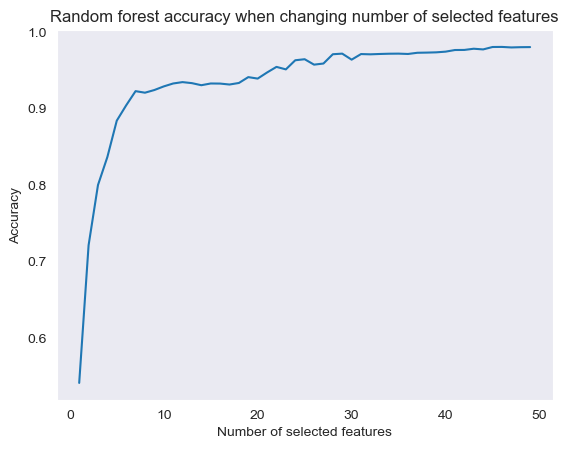

In [5]:
results_list=[]

for k in range (1,50):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature_selection",SelectKBest(k=k)),
        ("classifier", RandomForestClassifier(n_jobs=-1))
    ])
    results=cross_val_score(pipe, X, y, cv=KFold(5, shuffle=True, random_state=123),n_jobs=-1 )
    results_list.append(np.mean(results))

x=np.arange(1, 50)
plt.plot(x, results_list)
plt.xlabel("Number of selected features")
plt.ylabel("Accuracy")
plt.title("Random forest accuracy when changing number of selected features")
plt.grid()

As we can see from the graph, when we have around 40 features we obtain good results.

In [6]:
K_FEATURES = 40
permutation = np.random.permutation(range(1, 25))

#### Step 1: Metrics Computation and classifier selection

In [7]:
knn_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

true_labels_knn, predicted_labels_knn = custom_cross_validation(non_corr_df, knn_pipe, permutation=permutation)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":


In [8]:
report_knn = make_report(permutation, true_labels_knn, predicted_labels_knn)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [4]:
from sklearn.svm import SVC

In [9]:
SVC_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", SVC())
])

true_labels_svc, predicted_labels_svc = custom_cross_validation(non_corr_df, SVC_pipe, permutation=permutation)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":


In [10]:
svc_report = make_report(permutation, true_labels_svc, predicted_labels_svc)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [11]:
svc_report

,accuracy,precision,recall,f1_score,without_who
0,0.880000,0.911511,0.880000,0.882213,10.0
1,0.937500,0.949964,0.937500,0.939269,13.0
2,0.938073,0.947027,0.938073,0.938889,21.0
3,0.948980,0.959836,0.948980,0.950019,1.0
4,0.985673,0.986137,0.985673,0.985317,22.0
5,0.944304,0.946292,0.944304,0.943246,3.0
6,0.925301,0.941408,0.925301,0.925547,16.0
7,0.963446,0.966875,0.963446,0.963571,8.0
8,0.948864,0.948545,0.948864,0.948119,4.0
9,0.908257,0.922054,0.908257,0.907354,5.0


In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", DecisionTreeClassifier())
])

true_labels_tree, predicted_labels_tree = custom_cross_validation(non_corr_df, tree_pipe, permutation=permutation)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":


In [13]:
tree_report = make_report(permutation, true_labels_tree, predicted_labels_tree)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [14]:
tree_report

,accuracy,precision,recall,f1_score,without_who
0,0.704000,0.751488,0.704000,0.715617,10.0
1,0.890625,0.899856,0.890625,0.890178,13.0
2,0.866972,0.896099,0.866972,0.871373,21.0
3,0.864796,0.884321,0.864796,0.861404,1.0
4,0.896848,0.894281,0.896848,0.892290,22.0
5,0.812658,0.857552,0.812658,0.817612,3.0
6,0.915663,0.919094,0.915663,0.916842,16.0
7,0.853786,0.880599,0.853786,0.845779,8.0
8,0.900568,0.898837,0.900568,0.895523,4.0
9,0.761468,0.822458,0.761468,0.758385,5.0


In [15]:
from sklearn.linear_model import LogisticRegression
logregr_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", LogisticRegression(max_iter=1000))
])

true_labels_logregr, predicted_labels_logregr = custom_cross_validation(non_corr_df, logregr_pipe, permutation=permutation)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":


In [16]:
logreg_report = make_report(permutation, true_labels_logregr, predicted_labels_logregr)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [17]:
logreg_report

,accuracy,precision,recall,f1_score,without_who
0,0.728000,0.896156,0.728000,0.722495,10.0
1,0.925000,0.942316,0.925000,0.927368,13.0
2,0.949541,0.951324,0.949541,0.948940,21.0
3,0.918367,0.927744,0.918367,0.918191,1.0
4,0.971347,0.972691,0.971347,0.971013,22.0
5,0.951899,0.954205,0.951899,0.949844,3.0
6,0.971084,0.971864,0.971084,0.971384,16.0
7,0.942559,0.948708,0.942559,0.940812,8.0
8,0.866477,0.877572,0.866477,0.865182,4.0
9,0.871560,0.891781,0.871560,0.870237,5.0


In [18]:
from sklearn.naive_bayes import GaussianNB
nb_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", GaussianNB())
])

true_labels_nb, predicted_labels_nb = custom_cross_validation(non_corr_df, nb_pipe, permutation=permutation)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":


In [19]:
nb_report = make_report(permutation, true_labels_nb, predicted_labels_nb)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [20]:
nb_report

,accuracy,precision,recall,f1_score,without_who
0,0.629333,0.682405,0.629333,0.596043,10.0
1,0.603125,0.725748,0.603125,0.572896,13.0
2,0.605505,0.739684,0.605505,0.580715,21.0
3,0.864796,0.872246,0.864796,0.862460,1.0
4,0.848138,0.857148,0.848138,0.844531,22.0
5,0.534177,0.764479,0.534177,0.494504,3.0
6,0.624096,0.773924,0.624096,0.601689,16.0
7,0.676240,0.656806,0.676240,0.640901,8.0
8,0.659091,0.618122,0.659091,0.587601,4.0
9,0.737003,0.826645,0.737003,0.716019,5.0


In [21]:
ranfor_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", RandomForestClassifier(n_jobs=-1))
])

true_labels_ranfor, predicted_labels_ranfor = custom_cross_validation(non_corr_df, ranfor_pipe, permutation=permutation)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if permutation == "random":


In [22]:
ranfor_report = make_report(permutation, true_labels_ranfor, predicted_labels_ranfor)

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [23]:
ranfor_report

,accuracy,precision,recall,f1_score,without_who
0,0.810667,0.920683,0.810667,0.825343,10.0
1,0.925000,0.942906,0.925000,0.925381,13.0
2,0.860092,0.924944,0.860092,0.866585,21.0
3,0.946429,0.958693,0.946429,0.946703,1.0
4,0.977077,0.977120,0.977077,0.977020,22.0
5,0.891139,0.913804,0.891139,0.883809,3.0
6,0.959036,0.964772,0.959036,0.960222,16.0
7,0.890339,0.924156,0.890339,0.883565,8.0
8,0.892045,0.892937,0.892045,0.882163,4.0
9,0.859327,0.885709,0.859327,0.858234,5.0


Let's compare this first results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
print(
    report_knn["accuracy"].mean(),
    svc_report["accuracy"].mean(),
    logreg_report["accuracy"].mean(),
    nb_report["accuracy"].mean(),
    tree_report["accuracy"].mean(),
    ranfor_report["accuracy"].mean(),
)

0.8646275322747227 0.9286175289005913 0.9082060472740539 0.6998955239862995 0.852851766674947 0.9115295902047666


<AxesSubplot: title={'center': 'Random Forest'}>

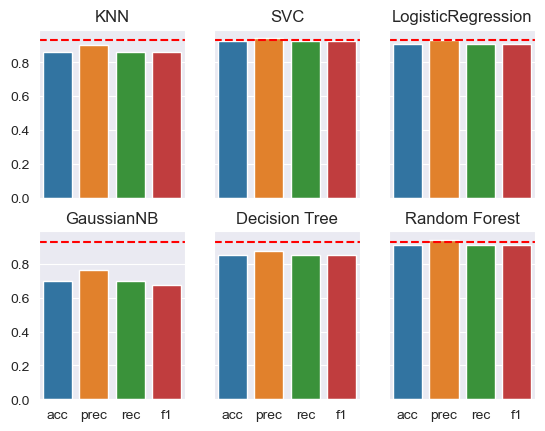

In [26]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
ax[0][0].set_title("KNN")
ax[0][0].axhline(y = 0.93, color = 'r', linestyle = 'dashed')
sns.barplot(x=["acc", "prec", "rec", "f1"], y= [report_knn["accuracy"].mean(),
                                                                  report_knn["precision"].mean(),
                                                                  report_knn["recall"].mean(),
                                                                  report_knn["f1_score"].mean()],
            ax=ax[0][0])
ax[0][1].set_title("SVC")
ax[0][1 ].axhline(y = 0.93, color = 'r', linestyle = 'dashed')
sns.barplot(x=["acc", "prec", "rec", "f1"], y= [svc_report["accuracy"].mean(),
                                                svc_report["precision"].mean(),
                                                svc_report["recall"].mean(),
                                                svc_report["f1_score"].mean()],
            ax=ax[0][1])

ax[0][2].set_title("LogisticRegression")
ax[0][2].axhline(y = 0.93, color = 'r', linestyle = 'dashed')
sns.barplot(x=["acc", "prec", "rec", "f1"], y= [logreg_report["accuracy"].mean(),
                                                logreg_report["precision"].mean(),
                                                logreg_report["recall"].mean(),
                                                logreg_report["f1_score"].mean()],
            ax=ax[0][2])

ax[1][0].set_title("GaussianNB")
ax[1][0].axhline(y = 0.93, color = 'r', linestyle = 'dashed')
sns.barplot(x=["acc", "prec", "rec", "f1"], y= [nb_report["accuracy"].mean(),
                                                nb_report["precision"].mean(),
                                                nb_report["recall"].mean(),
                                                nb_report["f1_score"].mean()],
            ax=ax[1][0])

ax[1][1].set_title("Decision Tree")
ax[1][1].axhline(y = 0.93, color = 'r', linestyle = 'dashed')
sns.barplot(x=["acc", "prec", "rec", "f1"], y= [tree_report["accuracy"].mean(),
                                                tree_report["precision"].mean(),
                                                tree_report["recall"].mean(),
                                                tree_report["f1_score"].mean()],
            ax=ax[1][1])

ax[1][2].set_title("Random Forest")
ax[1][2].axhline(y = 0.93, color = 'r', linestyle = 'dashed')
sns.barplot(x=["acc", "prec", "rec", "f1"], y= [ranfor_report["accuracy"].mean(),
                                                ranfor_report["precision"].mean(),
                                                ranfor_report["recall"].mean(),
                                                ranfor_report["f1_score"].mean()],
            ax=ax[1][2])

As we can see, SVC and RandomForest seems to have better results than others.

#### Step 2: Tuning Parameters
- SVC : C varying between 1 and 100
- RandomForest : Estimators between 80 and 120

In [11]:
results_list_svc=[]

for n in range(1,100,10):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature-selector", SelectKBest(k=K_FEATURES)),
        ("classifier", SVC(C=n))
    ])
    perm, y_true_A, y_pred_A = custom_cross_validation(non_corr_df, pipe, permutation="random")
    rep= make_report(perm, y_true_A, y_pred_A)
    results_list_svc.append(np.mean(rep["accuracy"].mean()))

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Text(0, 0.5, 'Accuracy')

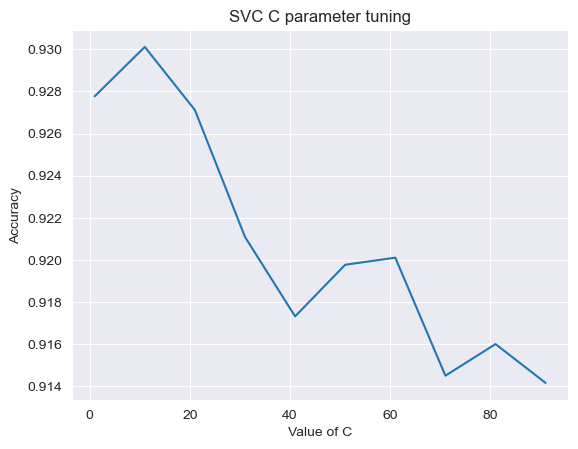

In [12]:
plt.plot(range(1, 100, 10), results_list_svc)
plt.title("SVC C parameter tuning")
plt.xlabel("Value of C")
plt.ylabel("Accuracy")

With no big improvements to test with statistic test, we decide to keep default parameter (C = 1.0)

In [15]:
results_list_ranfor=[]

for n in range(80,120,10):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature-selector", SelectKBest(k=K_FEATURES)),
        ("classifier", RandomForestClassifier(n_estimators=n, n_jobs=-1))
    ])
    perm, y_true_B, y_pred_B = custom_cross_validation(non_corr_df, pipe)
    rep= make_report(perm, y_true_B, y_pred_B)
    results_list_ranfor.append(np.mean(rep["accuracy"].mean()))

C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report = report.append({
C:\Users\angel\Desktop\Università\DataMiningFinale\LavorettiFinali\creation_functions\utilities.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Text(0, 0.5, 'Accuracy')

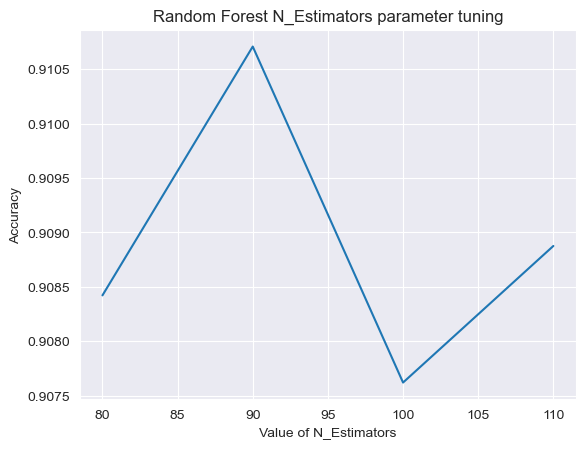

In [16]:
plt.plot(range(80, 120, 10), results_list_ranfor)
plt.title("Random Forest N_Estimators parameter tuning")
plt.xlabel("Value of N_Estimators")
plt.ylabel("Accuracy")